`yfinance` is the most popular open source library to access the financial data available on Yahoo Finance.

Yahoo Finance used to have their own official API, but this was decommissioned 2017.

These days a range of unofficial APIs and libraries exist to access the same data, including of course yfinance.

Note you might know of yfinance under it’s old name- `fix-yahoo-finance`, since it was re-named on May 26th 2019. To ensure backwards compatibility, fix-yahoo-finance now imports and uses yfinance anyway.

Now, yfinance generally is considered great for prototyping, or doing basic research on historic data.

But if you are building a serious trading system requiring complete confidence and total reliability on the data fed to the system, I’d recommend going with a official and alternative market data provider- preferably one claiming to provide low latency data directly from exchanges.

Like Polygon or IEX.


In [ ]:
!pip install yfinance

# Some other packages that I am going to use in this notebook
!pip install hvplot
!pip install mplcyberpunk

In [ ]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy as np
import hvplot.pandas

import mplcyberpunk
from matplotlib import style
style.use('cyberpunk')

import matplotlib.pyplot as plt
import seaborn

In [ ]:
goog_stock = yf.Ticker("GOOG")

# get stock info
print(goog_stock.info)

{'zip': '94043', 'sector': 'Communication Services', 'fullTimeEmployees': 135301, 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. The company offers performance and brand advertising services. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, such as ads, Android, Chrome, hardware, Google Maps, Google Play, Search, and YouTube, as well as technical infrastructure; and digital content. The Google Cloud segment offers infrastructure and data analytics platforms, collaboration tools, and other services for enterprise customers. The Other Bets segment sells internet and TV services, as well as licensing and research and development services. The company was founded in 1998 and is headquartered in Mountain View, California.', 'city': 'Mountain View', 'phone': '650-253-0000', 'state

In [ ]:
type(goog_stock.info)

dict

In [ ]:
goog_stock_info_dict = goog_stock.info

for key, value in goog_stock_info_dict.items():
  print(key, ":", value)

zip : 94043
sector : Communication Services
fullTimeEmployees : 135301
longBusinessSummary : Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. The company offers performance and brand advertising services. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, such as ads, Android, Chrome, hardware, Google Maps, Google Play, Search, and YouTube, as well as technical infrastructure; and digital content. The Google Cloud segment offers infrastructure and data analytics platforms, collaboration tools, and other services for enterprise customers. The Other Bets segment sells internet and TV services, as well as licensing and research and development services. The company was founded in 1998 and is headquartered in Mountain View, California.
city : Mountain View
phone : 650-253-0000
state : CA
country : United S

In [ ]:
# goog_stock.recommendations
# type(goog_stock.recommendations)
goog_stock.recommendations.tail()


,Firm,To Grade,From Grade,Action
Date,,,,
2021-07-28 11:56:36,Oppenheimer,Outperform,,main
2021-07-28 15:01:22,Piper Sandler,Overweight,,main
2021-07-28 15:14:40,BMO Capital,Outperform,,main
2021-10-27 11:21:05,Raymond James,Outperform,,main
2021-10-27 12:11:57,Oppenheimer,Outperform,,main


In [ ]:
goog_stock.recommendations['To Grade'].value_counts()

Buy                  104
Outperform            55
Overweight            40
Neutral               18
Hold                  11
Perform                4
Market Outperform      3
Positive               3
                       2
Long-Term Buy          1
Equal-weight           1
Sell                   1
Strong Buy             1
Market Perform         1
Name: To Grade, dtype: int64

In [ ]:
# goog_stock.major_holders
goog_stock.institutional_holders

# Checked that JP's holding Matches with the number reported in nasdaq
# https://www.nasdaq.com/market-activity/stocks/goog/institutional-holdings

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",21272689,2021-06-29,0.0664,53316165894
1,Blackrock Inc.,19114259,2021-06-29,0.0597,47906449616
2,Price (T.Rowe) Associates Inc,13993372,2021-06-29,0.0437,35071868111
3,State Street Corporation,10659743,2021-06-29,0.0333,26716727075
4,"FMR, LLC",8028176,2021-06-29,0.0251,20121178072
5,"Geode Capital Management, LLC",4528294,2021-06-29,0.0141,11349353818
6,Capital International Investors,4144906,2021-06-29,0.0129,10388460805
7,JP Morgan Chase & Company,3920416,2021-06-29,0.0122,9825817029
8,Northern Trust Corporation,3670462,2021-06-29,0.0115,9199352319
9,"AllianceBernstein, L.P.",3285355,2021-06-29,0.0103,8234150943


In [ ]:
# get historical market data
hist = goog_stock.history(period="150d")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-29,2027.880005,2058.429932,2015.619995,2055.949951,1229800,0,0
2021-03-30,2057.629883,2070.780029,2044.030029,2055.540039,1036600,0,0
2021-03-31,2059.120117,2093.326904,2056.745117,2068.629883,1459900,0,0
2021-04-01,2097.949951,2142.939941,2096.889893,2137.750000,1699000,0,0
2021-04-05,2152.939941,2237.310059,2151.620117,2225.550049,2164900,0,0
...,...,...,...,...,...,...,...
2021-10-22,2807.020020,2831.169922,2743.409912,2772.500000,1507600,0,0
2021-10-25,2776.209961,2784.115967,2734.969971,2775.459961,1054100,0,0
2021-10-26,2812.120117,2816.790039,2780.110107,2793.439941,1412900,0,0


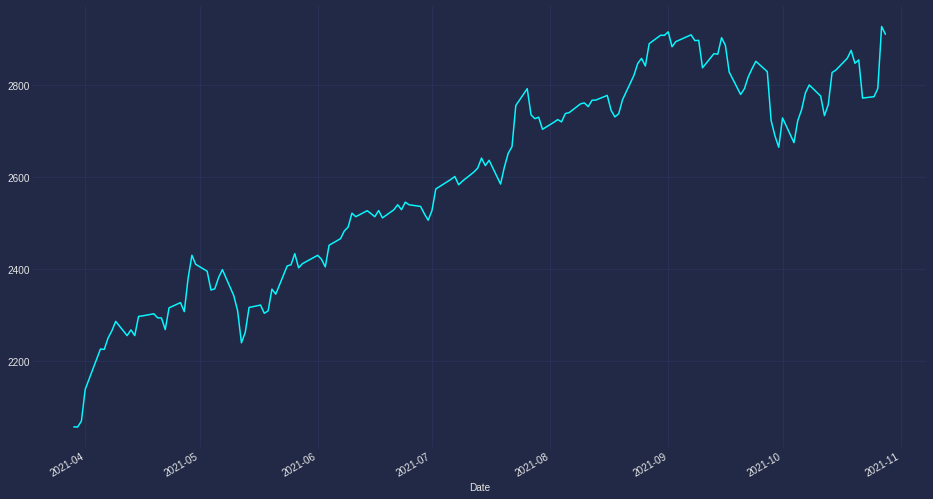

In [ ]:
# Plot the closing prices
hist['Close'].plot(figsize=(16, 9))

# Export data as CSV

In [ ]:
# Download stock data then export as CSV
data_df = yf.download("AAPL", start="2021-02-01", end="2021-03-20")
data_df.to_csv('aapl.csv')

[*********************100%***********************]  1 of 1 completed


# Sinter Ticker - Minute level data (Very useful for Time Series Analysis)

Now I will fetch the data of minute frequency. You can download for other frequency by just tweaking the interval parameter.

The supported values for the `interval` parameter is : 1m, 5m, 15m, 30m, 60m.

In [ ]:
data = yf.download(tickers="GOOG", period="5d", interval="1m")

data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-10-28 10:40:00-04:00,2909.260010,2909.330078,2908.995117,2909.330078,2909.330078,2046
2021-10-28 10:41:00-04:00,2910.469971,2910.469971,2909.020020,2909.020020,2909.020020,4172
2021-10-28 10:42:00-04:00,2907.804932,2907.804932,2906.620117,2906.620117,2906.620117,2239
2021-10-28 10:43:00-04:00,2907.899902,2907.899902,2907.899902,2907.899902,2907.899902,2413
2021-10-28 10:44:45-04:00,2911.409912,2911.409912,2911.409912,2911.409912,2911.409912,0


# Multiple Tickers

In the below code, I will fetch the data of multiple stocks and store it in a dataframe.
Then will calculate the daily returns and plot the cumulative returns of all the list of stocks.

In [ ]:
tickers_list = ['AAPL', 'GOOG', 'FB', 'TSLA']

tickers_df = yf.download(tickers_list,'2020-1-1')['Adj Close']

tickers_df.tail()

[*********************100%***********************]  4 of 4 completed


,AAPL,FB,GOOG,TSLA
Date,,,,
2021-10-22,148.690002,324.609985,2772.500000,909.679993
2021-10-25,148.639999,328.690002,2775.459961,1024.859985
2021-10-26,149.320007,315.809998,2793.439941,1018.429993
2021-10-27,148.850006,312.220001,2928.550049,1037.859985
2021-10-28,152.500000,313.459991,2911.409912,1070.469971


# Multiple Tickers - Calculating % Change of Stock-Price

-  calculate percentage changes with "pct_change()"
-  multiply by 100 to get percentage value
-  round off the percentages to 2 decimal points

In [ ]:
portfolio_daily_return_df = round(tickers_df[tickers_list].pct_change() * 100, 2)

portfolio_daily_return_df.tail(10)

,AAPL,GOOG,FB,TSLA
Date,,,,
2021-10-15,0.75,0.19,-1.15,3.02
2021-10-18,1.18,0.91,3.26,3.21
2021-10-19,1.51,0.60,1.39,-0.67
2021-10-20,0.34,-0.98,0.23,0.18
2021-10-21,0.15,0.26,0.32,3.26
2021-10-22,-0.53,-2.91,-5.05,1.75
2021-10-25,-0.03,0.11,1.26,12.66
2021-10-26,0.46,0.65,-3.92,-0.63
2021-10-27,-0.31,4.84,-1.14,1.91


# Plot Daily % Change:

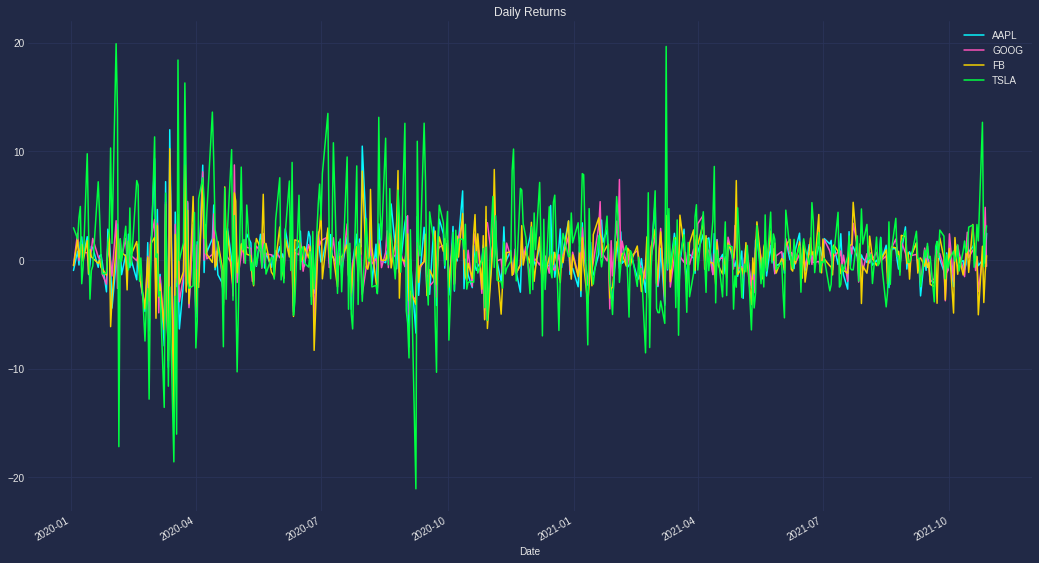

In [ ]:
portfolio_daily_return_df.plot(figsize=(18, 10), title="Daily Returns")

# Cumulative Stock return of multiple tickers and plotting them

cumprod() -> https://www.w3schools.com/python/pandas/ref_df_cumprod.asp

The cumprod() method returns a DataFrame with the cumulative product for each row.

The cumprod() method goes through the values in the DataFrame, from the top, row by row, multiplying the values with the value from the previous row, ending up with a DataFrame where the last row contains the product of all values for each column.

If the axis parameter is set to axes='columns', the method goes through the values, column by column, and ends up with a DataFrame where the last columns contains the product of all values for each row.

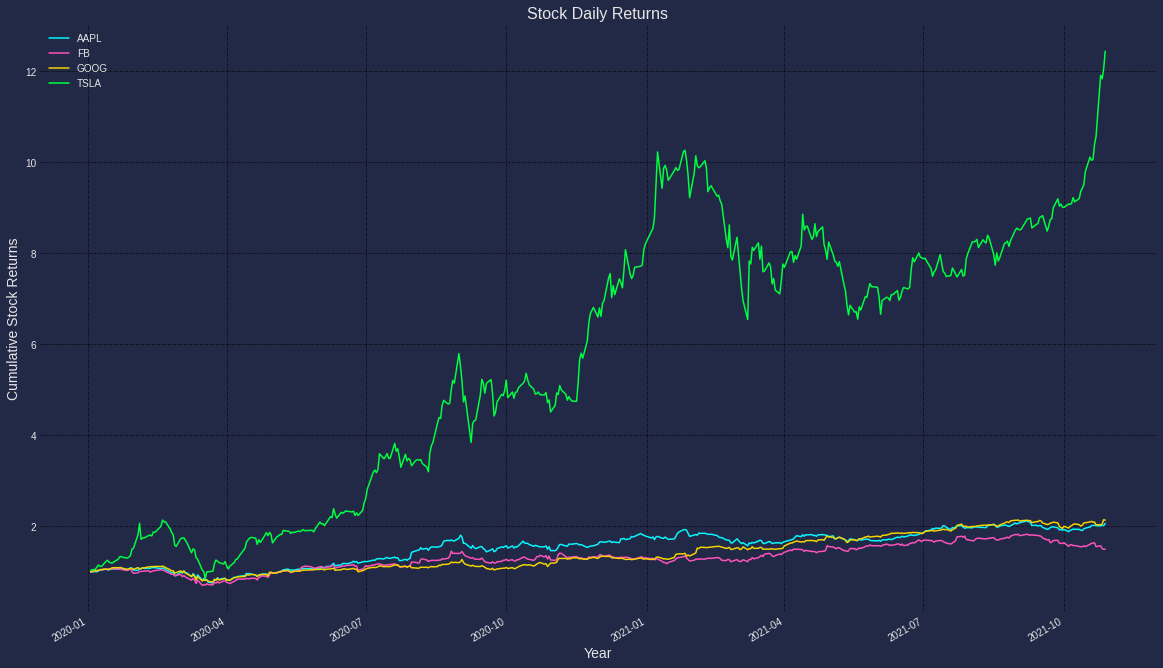

In [ ]:
# Calculating Cumulative % change for Plotting all the closing prices
((tickers_df.pct_change()+1).cumprod()).plot(figsize=(20, 12))

plt.legend()
plt.title("Stock Daily Returns", fontsize=16)
plt.ylabel('Cumulative Stock Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Standard Deviation — 

- helps determine market volatility or the spread of asset prices from their average price.
- When prices have big swings and move wildly, standard deviation is high, meaning an investment will be risky, the lower the ‘std()’ the less risky.

### Below Calculating daily STD

In [ ]:
portfolio_daily_return_df.std()

AAPL    2.417138
GOOG    2.058606
FB      2.474736
TSLA    4.738273
dtype: float64

In [ ]:
# Now Calculate the annualized standard deviation (252 trading days)

portfolio_daily_return_df.std() * np.sqrt(252)

AAPL    38.370869
GOOG    32.679363
FB      39.285214
TSLA    75.217753
dtype: float64

# Construct a correlation table


In [ ]:
corr_df = portfolio_daily_return_df.corr()

corr_df.style.background_gradient(cmap="summer")

,AAPL,GOOG,FB,TSLA
AAPL,1.000000,0.705276,0.714479,0.471770
GOOG,0.705276,1.000000,0.748703,0.414678
FB,0.714479,0.748703,1.000000,0.378754
TSLA,0.471770,0.414678,0.378754,1.000000


#  Calculate a rolling window using the Exponentially Weighted Moving Average. 

EMA is a moving average that places a greater weight and significance on the most recent data points.

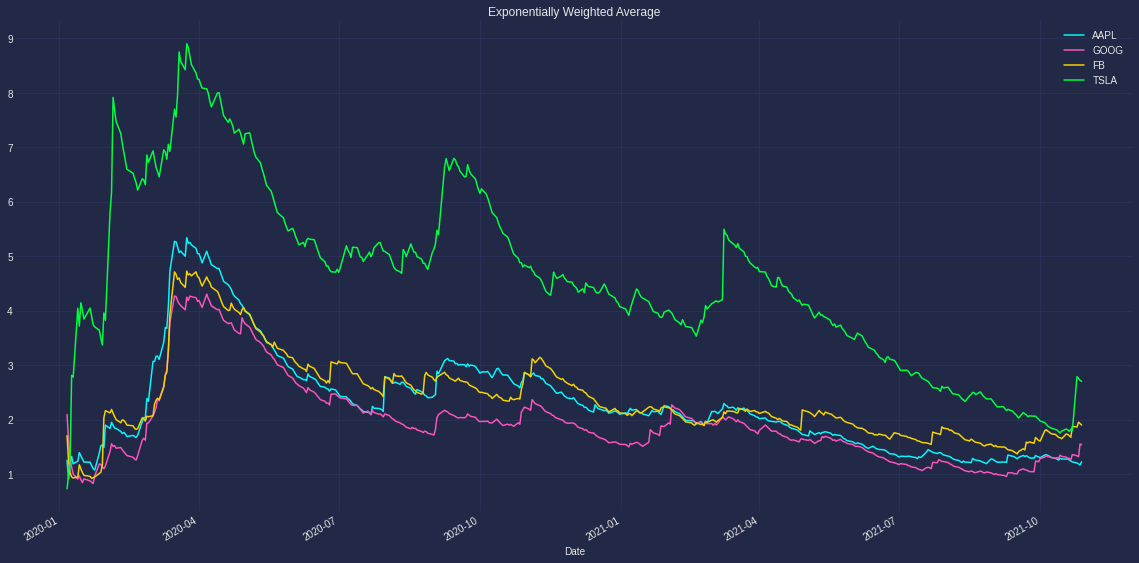

In [ ]:
portfolio_daily_return_df.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

# Calculate annualized Sharpe Ratios

The Sharpe ratio is one of the most widely used methods for calculating risk-adjusted return.

In [ ]:
# !pip install --upgrade --force-reinstall --no-deps hvplot

sharpe_ratios = (portfolio_daily_return_df.mean() * 252) / (portfolio_daily_return_df.std() * np.sqrt(252))

# Visualize the sharpe ratios as a bar plot

sharpe_ratios.hvplot.barh(figsize=(15, 8), title="Sharpe Ratios", color= 'red')

# Get data for all stock tickers in S&P500 (or for other Listed indexes)

Here, I can get the tickers from the Wikipedia page and use those tickers to get data from yfinance.

In [ ]:
sp_500_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

sp_500_tickers.head()


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
# Now get the data for this tickers from yahoo finance
sp_500_yf_df = yf.download(sp_500_tickers.Symbol.to_list(),'2021-5-1','2021-10-12', auto_adjust=True)['Close']

sp_500_yf_df.head()

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-03,132.849731,21.950001,199.860977,132.117294,112.057091,122.881981,308.640015,118.618675,290.485199,503.459991,150.048904,63.897034,189.697632,287.500000,84.088005,87.206932,27.179838,53.890156,48.461674,156.524124,144.104721,107.019997,165.342697,599.770020,68.690002,126.628380,135.365753,132.375977,11.564848,78.550003,133.907349,241.799530,255.636017,250.050980,3386.489990,314.709991,361.549988,384.291107,251.971878,70.026665,...,231.956406,88.663879,39.200802,76.078430,178.965225,44.629360,187.966232,221.250000,217.949997,55.062225,13.304370,56.604321,80.751823,301.670013,53.311386,70.120003,96.616478,75.321190,45.184334,238.040192,259.364258,139.252502,24.004622,141.045029,79.677971,56.884193,329.728851,25.132883,38.464024,128.860001,70.662529,123.550003,57.110996,67.768227,111.099686,119.037743,177.397537,479.049988,55.134338,175.018555
2021-05-04,130.565582,21.420000,202.128296,127.442261,111.294930,124.926865,305.000000,116.643852,289.918488,490.700012,150.633957,64.361702,192.184509,279.730011,84.117622,86.911919,26.543819,54.255878,47.819469,156.345581,144.541824,105.190002,161.477829,582.150024,66.559998,126.341774,136.698807,128.260712,12.192627,78.610001,135.622192,243.750641,255.318756,246.544205,3311.870117,305.540009,350.600006,389.351013,253.439011,71.262016,...,231.378036,88.881027,39.507214,76.088165,188.457321,46.308697,187.936310,219.220001,214.850006,54.491329,13.205819,57.268875,81.080894,299.750000,53.134663,67.279999,96.478455,73.765335,45.442646,240.697708,261.143097,139.788315,23.820494,139.655624,79.905586,57.340298,329.049164,25.328775,38.288166,124.349998,70.879578,123.059998,57.470245,68.704880,115.430183,118.432533,172.402786,470.619995,56.645000,173.550400
2021-05-05,133.029282,21.570000,200.801559,127.691467,113.131927,117.948425,300.790009,117.606461,287.850464,486.690002,152.636978,65.449234,191.877380,281.079987,83.288193,86.017029,26.305313,54.740219,48.283829,158.121216,146.488922,108.510002,166.498154,569.250000,66.910004,125.956345,135.534866,129.825089,12.045491,77.830002,136.469650,245.711609,259.006805,246.266846,3270.540039,316.739990,355.489990,386.816101,253.868195,70.953186,...,228.565979,87.370880,38.647282,77.937798,188.746170,45.117542,172.095505,218.399994,213.869995,52.473499,13.442343,57.356831,80.921349,308.459991,53.478294,68.580002,95.196800,71.539871,45.641342,243.868958,261.540588,140.542419,24.149986,139.536530,79.559204,57.836063,328.449432,24.476646,37.672665,127.809998,69.804161,122.029999,59.198532,67.349716,116.833870,120.139015,173.020920,482.420013,57.484261,173.640289
2021-05-06,132.061752,21.490000,202.138199,129.326248,113.425072,116.767159,295.720001,117.884315,289.481018,483.609985,154.114471,65.933678,193.522095,284.350006,84.078133,86.656242,25.291660,55.530975,49.568237,160.581314,147.859818,110.180000,152.253952,584.719971,67.040001,131.065750,139.434586,131.259964,12.251480,77.889999,135.432755,247.633148,261.336639,241.729828,3306.370117,327.260010,332.660004,386.418488,256.133820,71.072731,...,230.670044,88.111137,37.708286,78.327194,190.449387,45.722885,174.478119,223.240005,213.160004,53.162510,13.728140,57.943203,81.530525,309.010010,53.468472,69.610001,96.567177,72.386734,46.427921,247.1

# Get Key Financial Metrics of multiple Tickers

The yf.Ticker method gives general information about the symbol, such as name, sector, EPS, PE, market capitalization, etc.

In [ ]:
from tqdm import tqdm

tickers_list     = ["amzn", "gme", "BTC-USD", ]

#  time period and interval
yf_period   = "1mo"   # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
yf_interval = "1d"    # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo


#  set parameters to download
stock_parameters = ["shortName", "sector", "industry", "quoteType", "exchange", "totalAssets", "marketCap", "beta", "trailingPE", "volume", "averageVolume", "fiftyTwoWeekLow", "fiftyTwoWeekHigh", "dividendRate", "phone"]

#  create dataframe
yf_metrics_df = pd.DataFrame(index = stock_parameters, columns = tickers_list)

for current_ticker in tqdm(tickers_list):
    current_ticker_param_info = []             # initialize
    yf_ticker_df = yf.Ticker(current_ticker)   # get ticker info
    for parameter in stock_parameters:
        if 'date' in parameter.lower():
            d = pd.to_datetime(yf_ticker_df.info[parameter])
            if d is not None:
                current_ticker_param_info.append(d.strftime("%Y-%m-%d"))  # format date
        else:
            try:      # some parameters error
                current_ticker_param_info.append(yf_ticker_df.info[parameter])
            except:   # ignore error and continue
                current_ticker_param_info.append("")
    yf_metrics_df[current_ticker] = current_ticker_param_info
    print('{}\t- financial information downloaded'.format(current_ticker))


yf_metrics_df

 33%|███▎      | 1/3 [00:02<00:05,  2.71s/it]

amzn	- financial information downloaded


 67%|██████▋   | 2/3 [00:05<00:02,  2.50s/it]

gme	- financial information downloaded


100%|██████████| 3/3 [00:07<00:00,  2.55s/it]

BTC-USD	- financial information downloaded


,amzn,gme,BTC-USD
shortName,"Amazon.com, Inc.",GameStop Corporation,Bitcoin USD
sector,Consumer Cyclical,Consumer Cyclical,
industry,Internet Retail,Specialty Retail,
quoteType,EQUITY,EQUITY,CRYPTOCURRENCY
exchange,NMS,NYQ,CCC
totalAssets,None,None,None
marketCap,1742673543168,13584891904,1158341853184
beta,1.15926,-1.78995,None
trailingPE,59.9533,,
volume,962156,423504,41069735936


# Yahoo! Finance Financial Information Parameter List

The yf.Ticker method gives general information about the symbol, such as name, sector, EPS, PE, market capitalization, etc.

`yf.Ticker(symbol).info` will give a full list of the parameters.

In [ ]:
amzn = yf.Ticker('AMZN').info
pram = pd.DataFrame(amzn).transpose()
pram = pram.reset_index() 
pram.rename(columns={'index':'PARAMETERS'}, inplace=True)
pram.sort_values(by=['PARAMETERS'],inplace=True)
pram.reset_index(drop=True, inplace=True)

# pram.head(7)  # remove ".head" to see the full list
pram

,PARAMETERS
0,52WeekChange
1,SandP52WeekChange
2,address1
3,algorithm
4,annualHoldingsTurnover
...,...
147,volumeAllCurrencies
148,website
149,yield
150,ytdReturn


# SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors)

SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model. ARIMA includes an autoregressive integrated moving average, while SARIMAX includes seasonal effects and eXogenous factors with the autoregressive and moving average component in the model. Therefore, we can say SARIMAX is a seasonal equivalent model like SARIMA and Auto ARIMA.

In [ ]:
tsla_stock = yf.Ticker("TSLA")

# On June 29, 2010, Tesla made its debut as a public company
tsla_historical_prices = tsla_stock.history(period="10y")

tsla_historical_prices.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-10-28,5.700,6.000,5.602,5.974,6320000,0,0.0
2011-10-31,5.900,5.902,5.750,5.874,5670000,0,0.0
2011-11-01,5.678,5.784,5.600,5.776,3176000,0,0.0
2011-11-02,5.800,5.852,5.650,5.742,4376500,0,0.0
2011-11-03,6.000,6.498,5.906,6.492,12548500,0,0.0


In [ ]:
tsla_closing_prices_df = tsla_historical_prices[[ 'Close']]

tsla_closing_prices_df.head()

,Close
Date,
2011-10-28,5.974
2011-10-31,5.874
2011-11-01,5.776
2011-11-02,5.742
2011-11-03,6.492


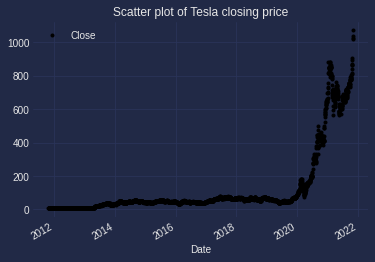

In [ ]:
tsla_closing_prices_df.plot(style='k.')

plt.title('Scatter plot of Tesla closing price')

plt.show()

# What is a stationary Time Series

- Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.
- Stationarity is important because many useful analytical tools and statistical tests and models rely on it.


It does not mean that the series does not change over time, just that the way it changes does not itself change over time. The algebraic equivalent is thus a linear function, perhaps, and not a constant one; the value of a linear function changes as 𝒙 grows, but the way it changes remains constant — it has a constant slope; one value that captures that rate of change.

![Imgur](https://imgur.com/lRvSyF3.png)

Prominent seasonality can be observed in series (d), (h) and (i).
Noticeable trends and changing levels can be seen in series (a), (c), (e), (f), and (i).
Series (i) shows increasing variance.

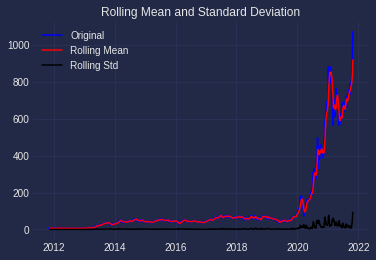

Results of dickey fuller test
(3.3184143923945197, 1.0, 27, 2489, {'1%': -3.4329799947351503, '5%': -2.862701915447137, '10%': -2.5673885329713495}, 17540.274753722297)
Test Statistics                   3.318414
p-value                           1.000000
No. of lags used                 27.000000
Number of observations used    2489.000000
critical value (1%)              -3.432980
critical value (5%)              -2.862702
critical value (10%)             -2.567389
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolling_mean = timeseries.rolling(12).mean()
    rolling_std = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")

    timeseries = timeseries.iloc[:,0].values
    adfuller_result = adfuller(timeseries,autolag='AIC')
    print(adfuller_result)
    """ By setting the autolag='AIC' the adfuller will choose the number of lags that yields the lowest AIC (Akaike information criterion ). 
    This is usually a good option to follow. 
    The Akaike information criterion (AIC) is an estimator of prediction error and 
    thereby relative quality of statistical models for a given set of data."""
    
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explain using a for loop
    output = pd.Series(adfuller_result[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    
    for key,values in adfuller_result[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(tsla_closing_prices_df)

From the plots of rolling mean and standard deviation itself you can understand that the standard deviation and mean variation is pretty high.

And also some interpretations from dicky fuller test results can be observed as

- The Null hypothesis in ADF test is that Data is not stationary
- It’s better to have the p-value to be smaller than 0.05 inorder to reject the null hypothesis and consider data as stationary.

### The p-value obtained above is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

### Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

In [ ]:
model=sm.tsa.statespace.SARIMAX(tsla_closing_prices_df['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
tsla_closing_prices_df.shape

(2517, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


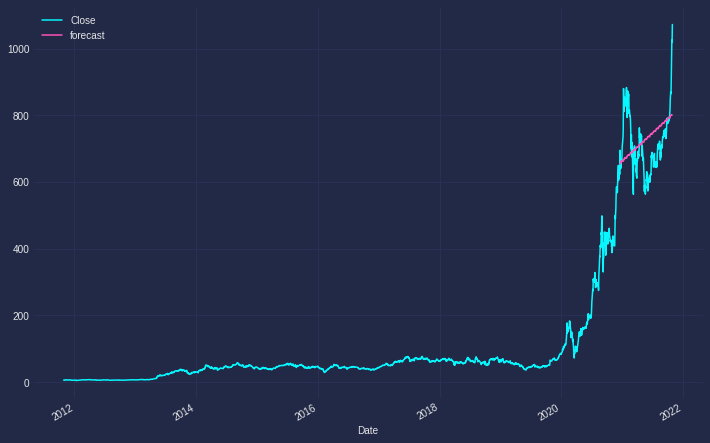

In [ ]:
tsla_closing_prices_df['forecast']=results.predict(start=2300,end=2514,dynamic=True)
tsla_closing_prices_df[['Close','forecast']].plot(figsize=(12,8))